<a href="https://colab.research.google.com/github/cbrumm/deep-learning-with-python-book/blob/main/Chapter_4_Regression_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

#print(train_data.shape, test_data.shape)
#print(train_data[0])
#print(type(train_data))

In [11]:

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# For test data, also use statistics from training data.
test_data -= mean
test_data /= std
#print(train_data[0])

In [17]:
import keras

def build_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [27]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_mae_histories = []
for i in range(k):
  print(f'processing fold #{i}')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  all_mae_histories.append(history.history['val_mae'])
average_mae_history = [np.mean([x[i] for x in all_mae_histories])
  for i in range(num_epochs)]

processing fold #0
processing fold #1
processing fold #2
processing fold #3


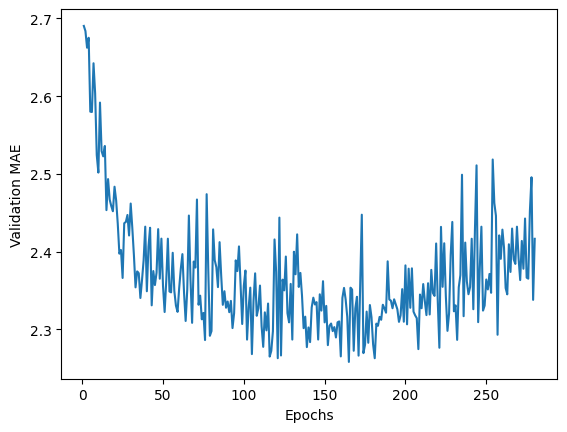

In [28]:
import matplotlib.pyplot as plt

truncated_mae_history = average_mae_history[20:] # Remove early wins
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [31]:
# Build new model with ~170 epochs
model = build_model()
model.fit(train_data, train_targets,
          epochs=170, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 13.8918 - mae: 2.4217
2.421689748764038


In [34]:
predictions = model.predict(test_data)
print(predictions[:5])
print(test_targets[:5])

4/4 [==============================] - 0s 3ms/step
[[ 8.7687435]
 [19.766102 ]
 [21.476936 ]
 [31.812399 ]
 [25.622622 ]]
[ 7.2 18.8 19.  27.  22.2]
